In [1]:
## Import Statements
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

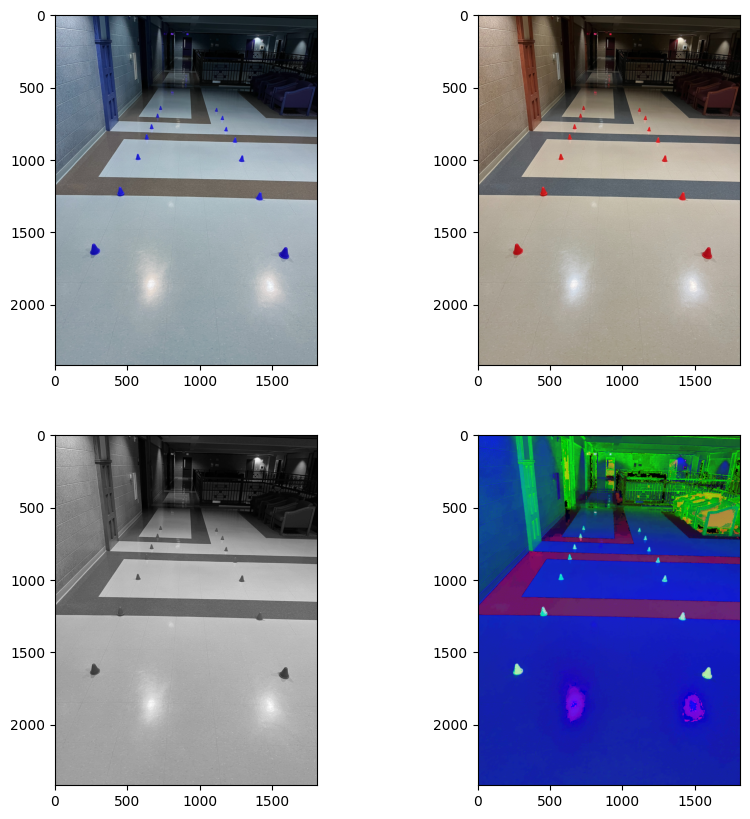

In [2]:
## Test basic Image-reading functionality

# Extract image in multiple Colorspaces
cvImg  = cv2.imread('/content/drive/My Drive/Colab Notebooks/Coding Challenge/red.png')
cvRGB  = cv2.cvtColor(cvImg,cv2.COLOR_BGR2RGB)
cvGrey = cv2.cvtColor(cvImg,cv2.COLOR_BGR2GRAY)
cvHSV  = cv2.cvtColor(cvImg,cv2.COLOR_BGR2HSV)

# Visualize image data
_,images = plt.subplots(2,2,figsize=(10, 10))
images[0,0].imshow(cvImg)
images[0,1].imshow(cvRGB)
images[1,0].imshow(cvGrey,cmap='gray')
images[1,1].imshow(cvHSV)

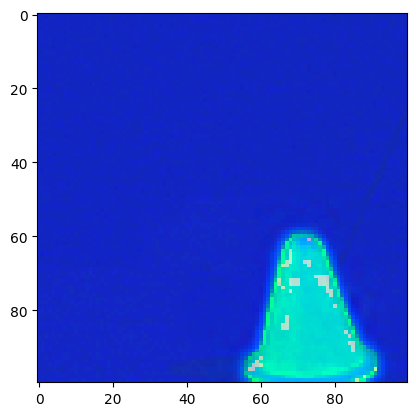

In [3]:
## WORKSPACE - Get HSV values for regions of interest

# Visualize region of interest
small = cvHSV[900:1000,500:600]
plt.imshow(small)

# Front Left - Brightest Cone
#cvHSV[1625,275] # 179,232,179

# Third Left - Dimmest Cone
#cvHSV[980,675]   # 1,216,213

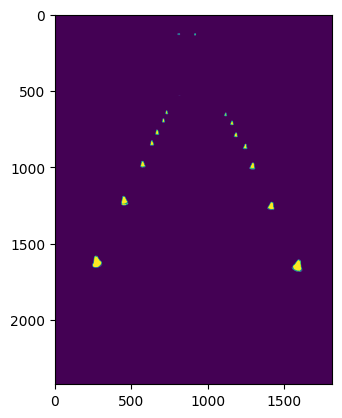

In [4]:
## Threshold image in advance

# Filter out as much non-Cone as possible
fLO = np.array([0,200,150])
fHI = np.array([255,255,255])
cvThresh = cv2.inRange(cvHSV,fLO,fHI)

# Base-Tolerance approach unsuccessful due to H value
#fBase = np.array([180,230,180])
#fTol = np.array([40,50,70])
#cvThresh = cv2.inRange(cvHSV,fBase-fTol,fBase+fTol)

# Visualize outcome
plt.imshow(cvThresh)

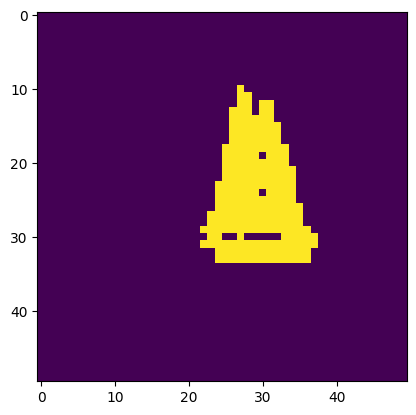

In [5]:
## WORKSPACE - Visualize regions of interest
small = cvThresh[620:670,700:750]
#small = cvThresh[100:150,900:950]
plt.imshow(small)

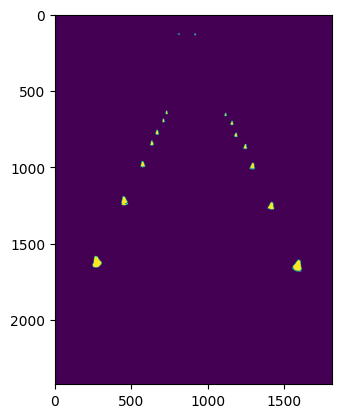

In [6]:
## Smooth inmage to ease Blob Detection
cvBlur = cv2.medianBlur(cvThresh,3)
plt.imshow(cvBlur)

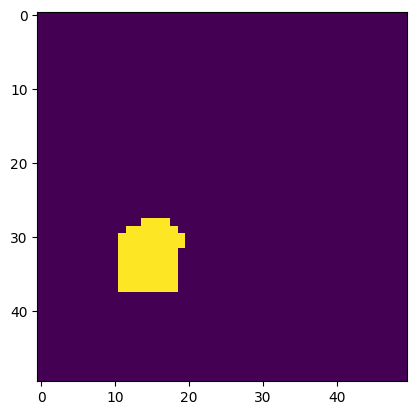

In [7]:
## WORKSPACE - Visualize regions of interest
#small = cvBlur[620:670,700:750]
small = cvBlur[100:150,900:950]
plt.imshow(small)

In [8]:
## Create Blob Detector

# Get parameter structure
params = cv2.SimpleBlobDetector_Params()

# Find LIGHT blobs on DARK background
params.filterByColor = True
params.blobColor = 255

# Find NON-CIRCULAR blobs
params.filterByConvexity = True
params.minConvexity = 0.5

# Thresholding already done by filters
#params.minThreshold
#params.maxThreshold

# Ignore SMALL blobs made by lights
params.filterByArea = True
params.minArea = 100

# Create Blob Detection Model
blobDet = cv2.SimpleBlobDetector_create(params)
kp = blobDet.detect(cvBlur)

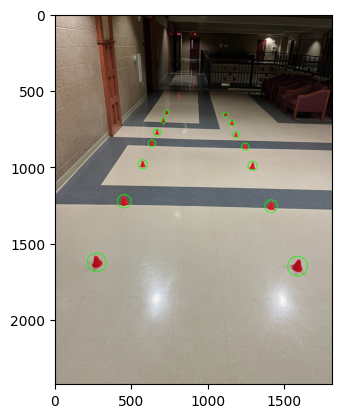

In [9]:
## Draw blob detector output onto image
  # cv2.drawKeypoints() has formatting issues
blobs = cvRGB.copy()
for point in kp :
  radius = int(point.size)
  x,y = int(point.pt[0]), int(point.pt[1])
  cv2.circle(blobs, (x,y), radius, (0,255,0), 4)
plt.imshow(blobs)

In [10]:
## WORKSPACE - Confirm correct points taken
coords = [kp[i].pt for i in range(0,len(kp))]
diams = [kp[i].size for i in range(0,len(kp))]
#diams

In [15]:
## METHOD to draw line of Best Fit from list of points
def drawLineBestFit (ptList, img) :

  # Use OpenCV library to get LOBF for points
  line = cv2.fitLine(np.array(ptList), distType=cv2.DIST_L2, param=0, reps=0.01, aeps=0.01)

  # Convert into drawable format
  slope = line[1,0]/line[0,0]
  p0 = (0, int(line[3,0] - slope*line[2,0]))
  pX = (img.shape[1], int(line[3,0] + slope*(img.shape[1]-line[2,0])))

  # Draw LOBF onto cloned image
  imgCP = img.copy()
  cv2.line(imgCP, p0, pX, (255,0,0), 4)
  return imgCP

In [16]:
## Partition points by side of image
L, R = [], []
for point in kp :
  if (point.pt[0] < cvImg.shape[1]/2) :
    L.append(point.pt)
  else : R.append(point.pt)

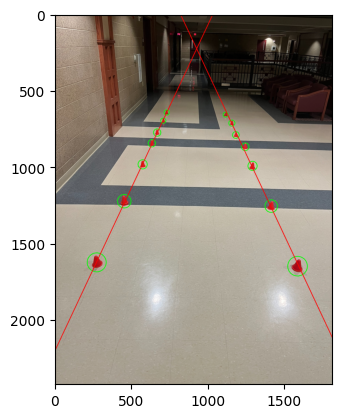

In [20]:
## Draw Lines Of Best Fit for partitioned data
blobsL = drawLineBestFit(L,blobs)
blobsRL = drawLineBestFit(R,blobsL)
plt.imshow(blobsRL)

In [19]:
## Write resultant Image
answer = cv2.cvtColor(blobsRL,cv2.COLOR_BGR2RGB)
os.chdir('/content/drive/My Drive/Colab Notebooks/Coding Challenge')
cv2.imwrite('answer.png', answer)

True